In [ ]:
import pandas as pd
df=pd.read_csv('loan_dataset.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

###Exploratory Data Analysis(EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


##Categorical Variables

In [ ]:
df['Loan_ID'].nunique()

614

<Axes: xlabel='Loan_Status'>

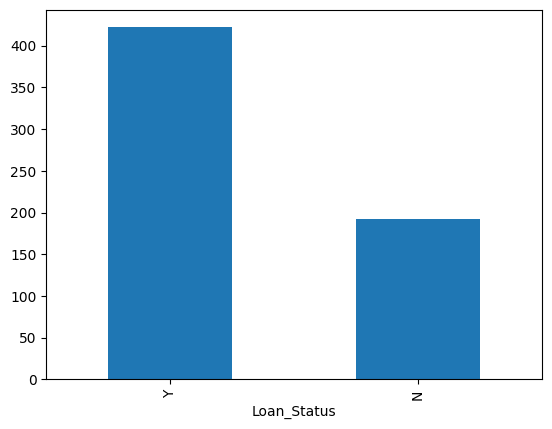

In [ ]:
df['Loan_Status'].value_counts().plot(kind='bar')

In [ ]:
df['Loan_Status'].value_counts(dropna=False, normalize=True).map("{:.2%}".format)

,proportion
Loan_Status,
Y,68.73%
N,31.27%


In [ ]:
categorical_cols=df.select_dtypes(include='object').columns.to_list()
print(categorical_cols)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [ ]:
df['Loan_Amount_Term'].dropna().unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [ ]:
df['Credit_History'].dropna().unique()

array([1., 0.])

In [ ]:
categorical_cols.remove('Loan_ID')
categorical_cols=categorical_cols+['Loan_Amount_Term','Credit_History']
print(categorical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term', 'Credit_History']


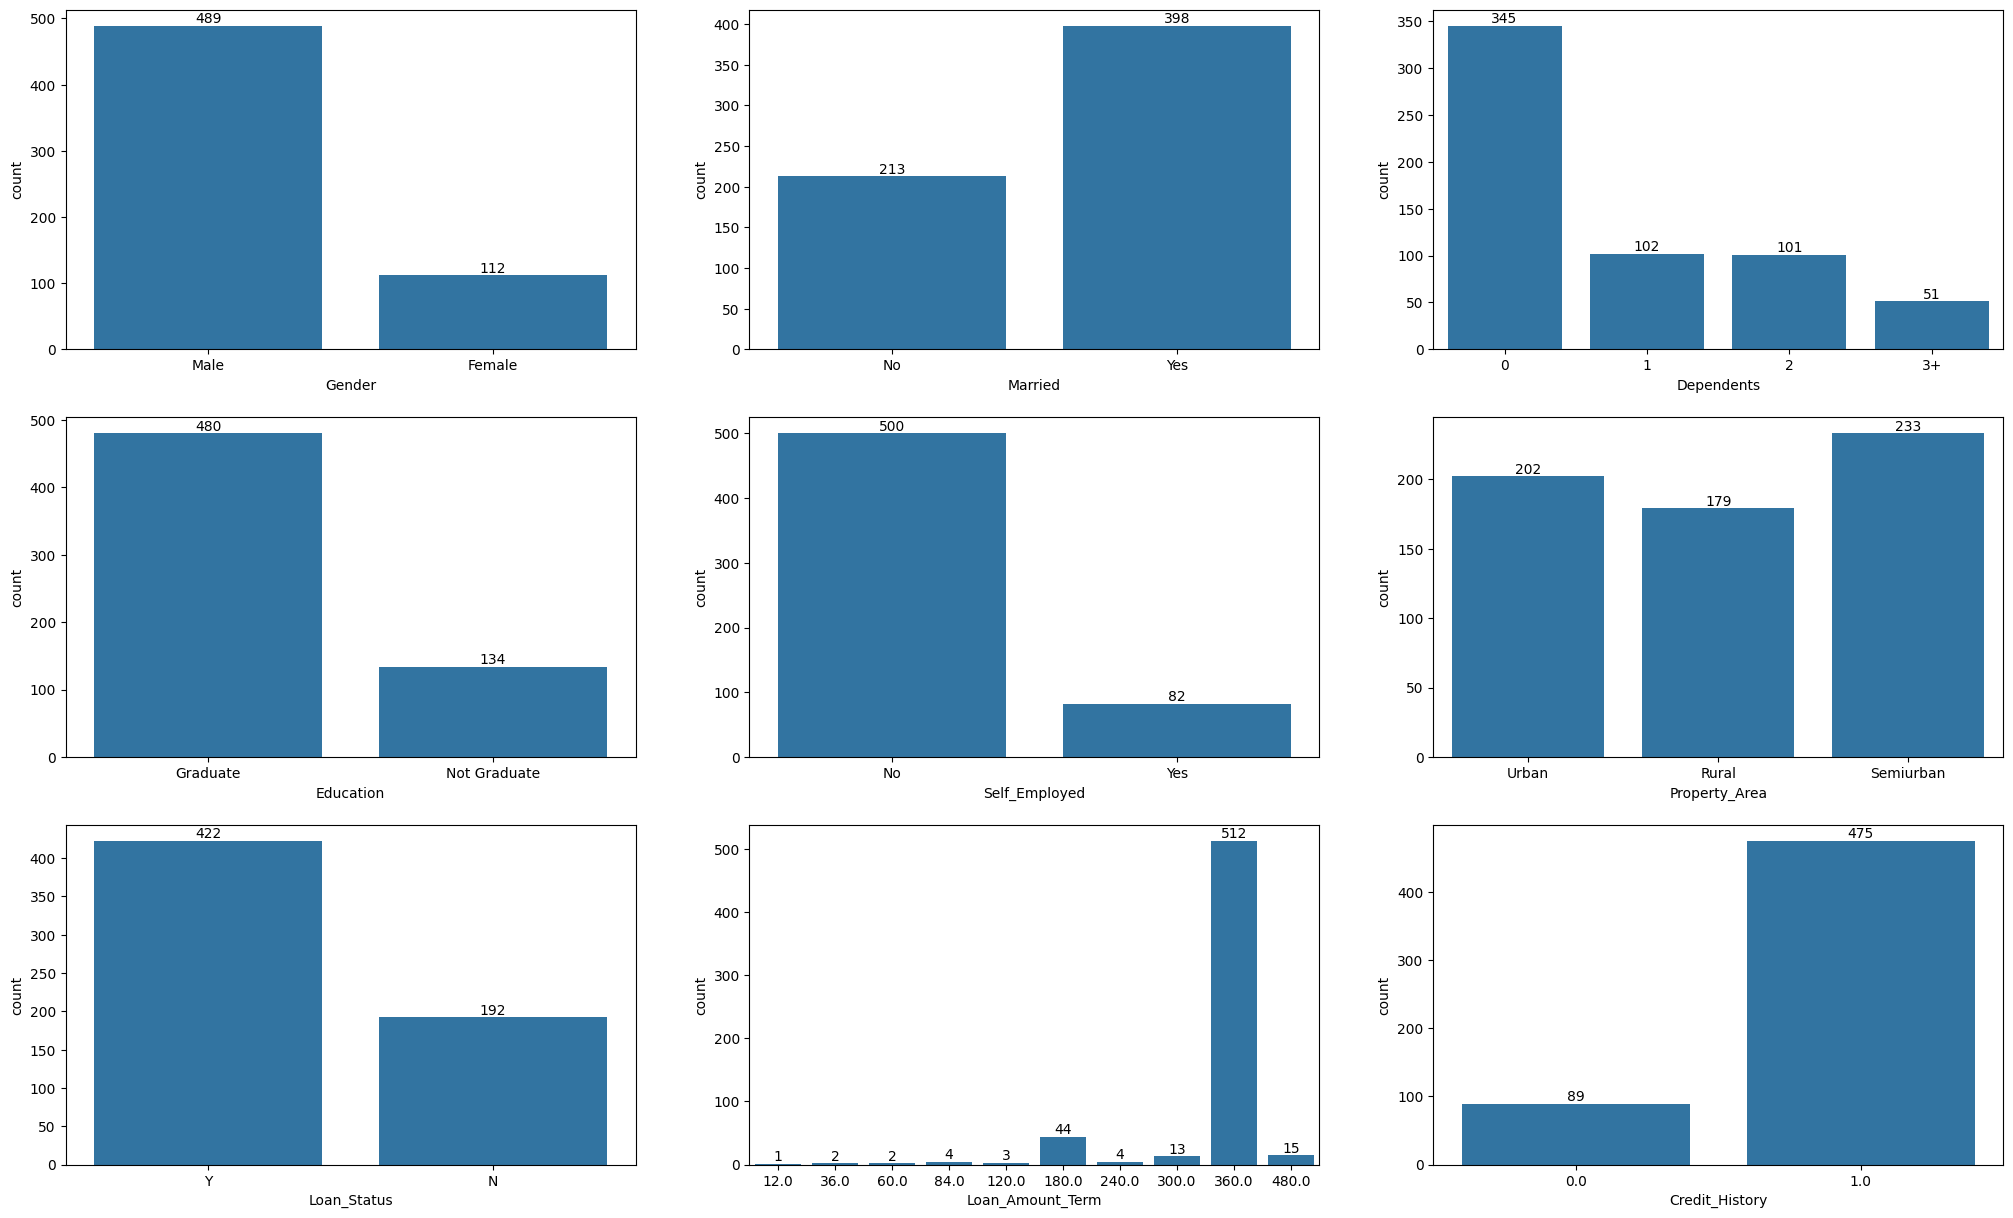

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(nrows=3 , ncols=3, figsize=(25,15))
for col,subplot in zip(categorical_cols,axes.flatten()):
  sns.countplot(x=df[col],ax=subplot).bar_label(subplot.containers[0])
plt.show()

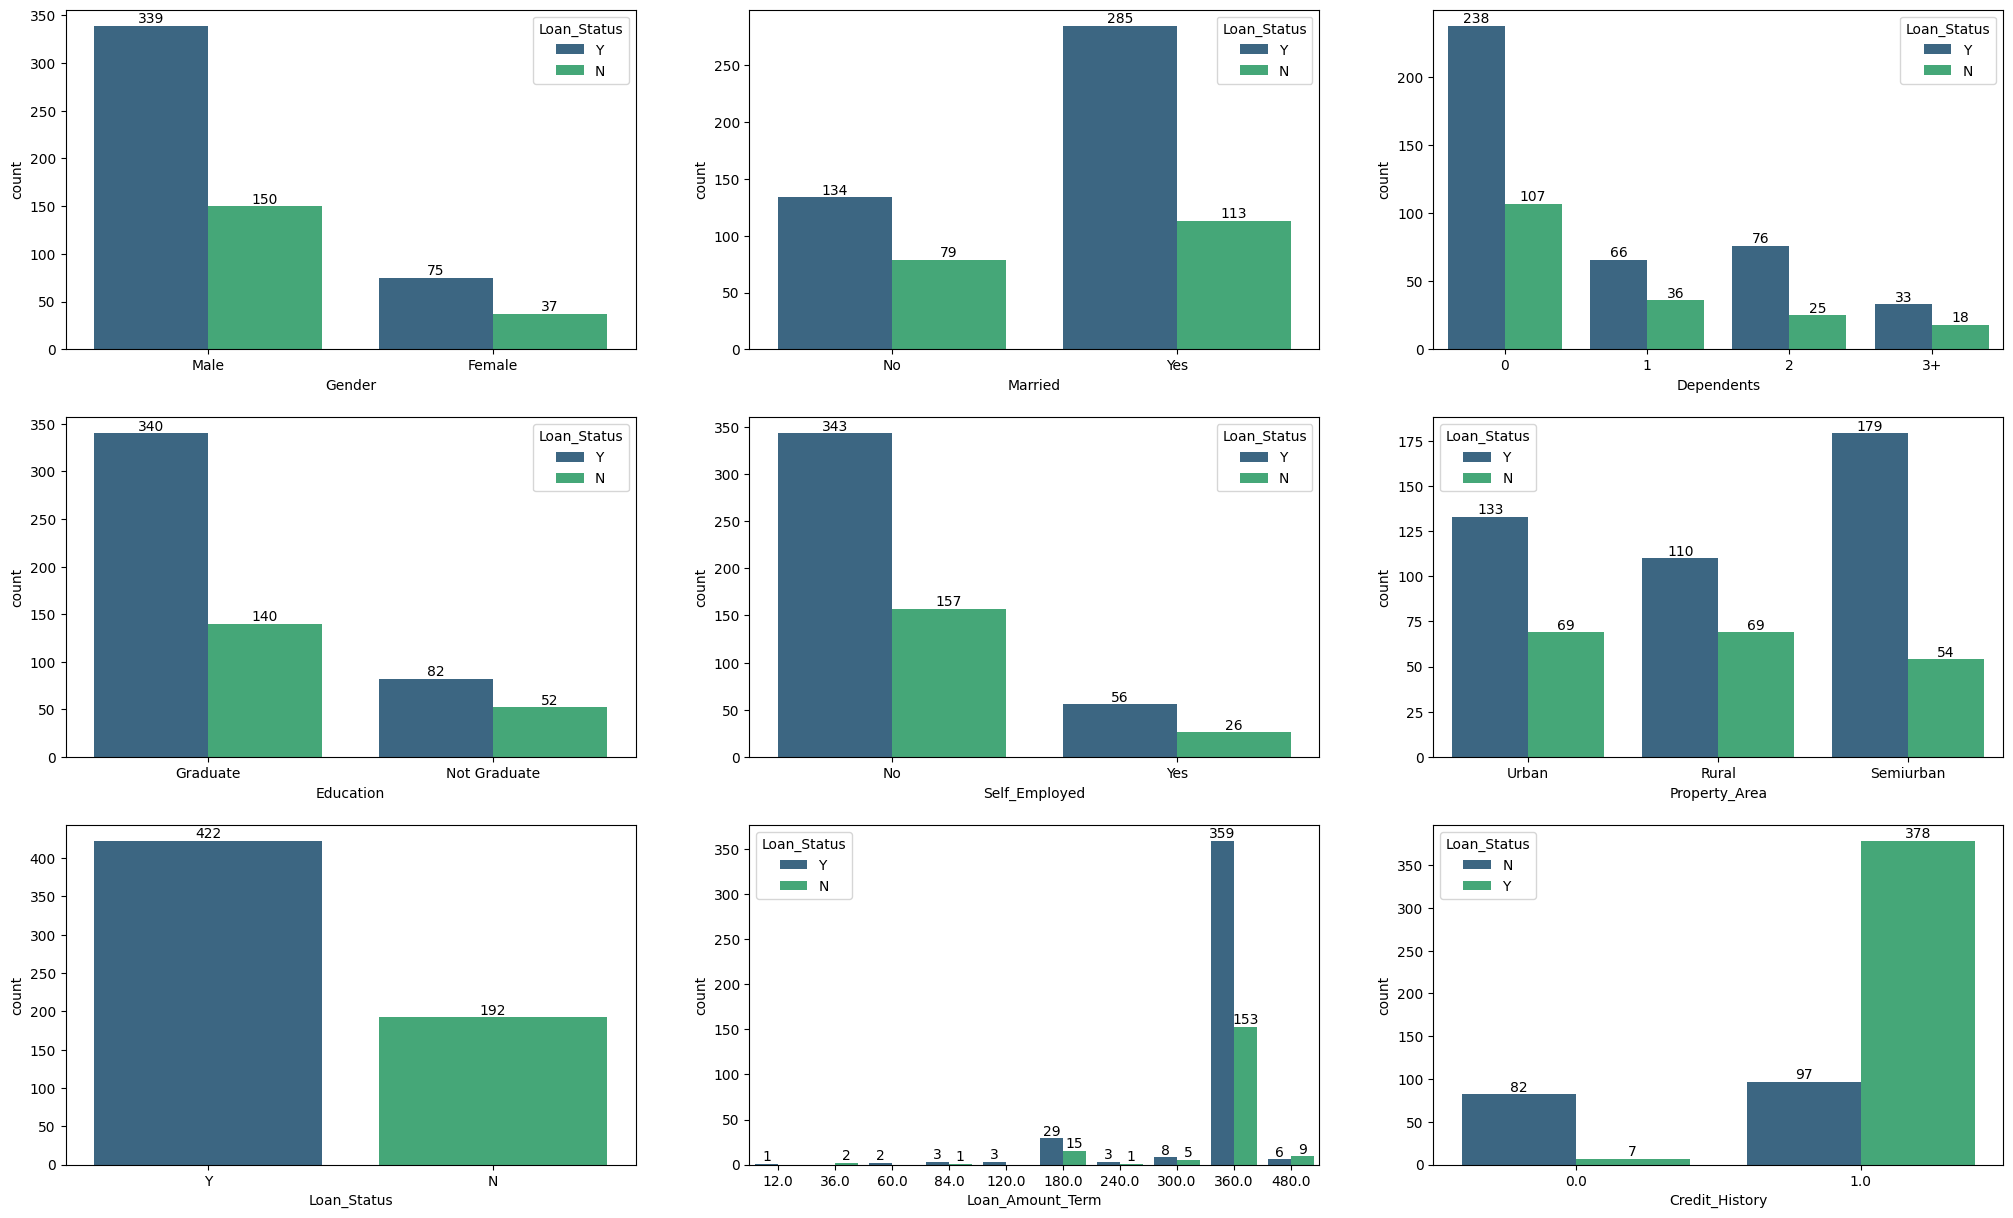

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig,axes = plt.subplots(nrows=3 , ncols=3, figsize=(25,15))
for col,subplot in zip(categorical_cols,axes.flatten()):
  plot=sns.countplot(x=df[col],hue=df['Loan_Status'],ax=subplot,palette='viridis')
  for container in plot.containers:
    plot.bar_label(container)
plt.show()

###Numerical Variables

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
numerical_cols=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
df[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


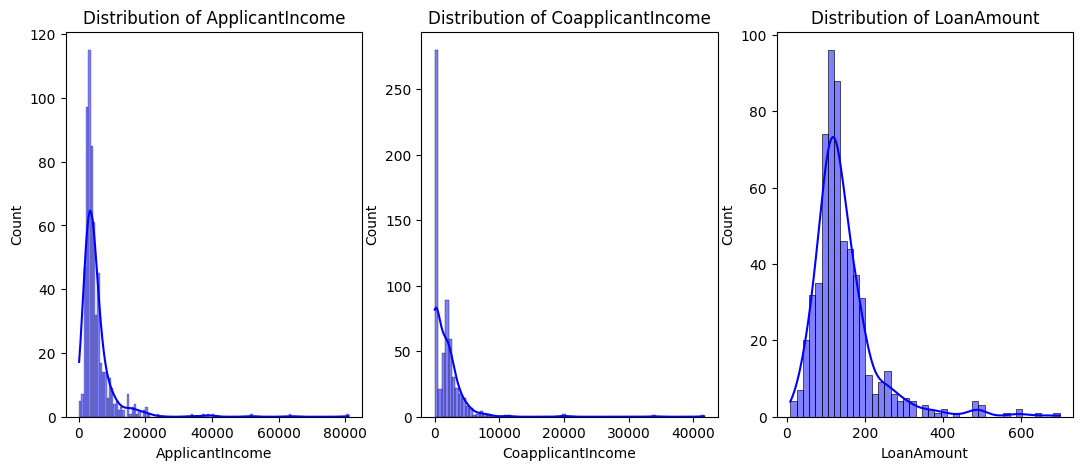

In [ ]:
fig,axes=plt.subplots(ncols=3,figsize=(13,5))
for index,col in enumerate(numerical_cols):
  sns.histplot(x=df[col],ax=axes[index],kde=True,color='blue',fill="False").set(title=f"Distribution of {col}")
plt.show()

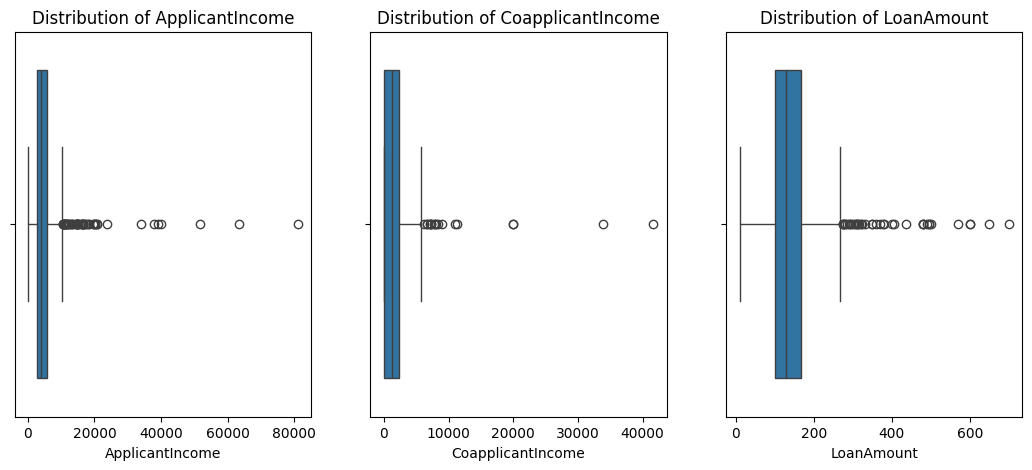

In [ ]:
fig,axes=plt.subplots(ncols=3,figsize=(13,5))
for index,col in enumerate(numerical_cols):
  sns.boxplot(x=df[col],ax=axes[index]).set(title=f"Distribution of {col}")
plt.show()

In [ ]:
df[numerical_cols].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


<Axes: >

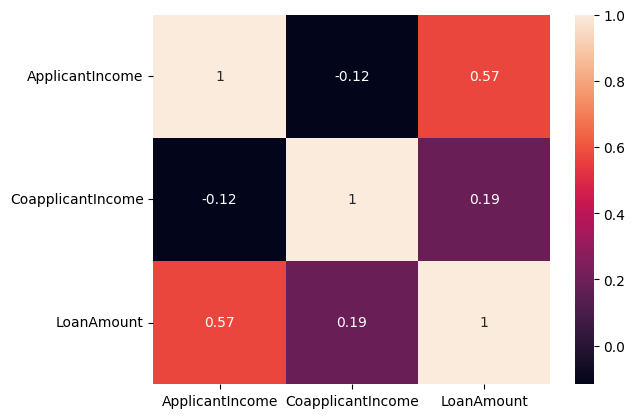

In [ ]:
sns.heatmap(df[numerical_cols].corr(),annot=True)


###Bivariate Analysis

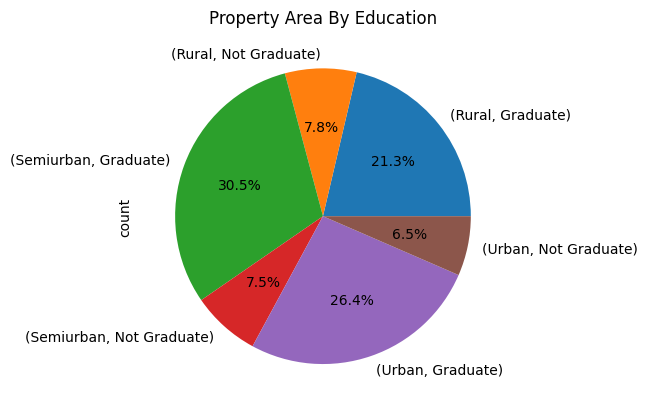

In [ ]:
df.groupby('Property_Area').Education.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Property Area By Education')
plt.show()

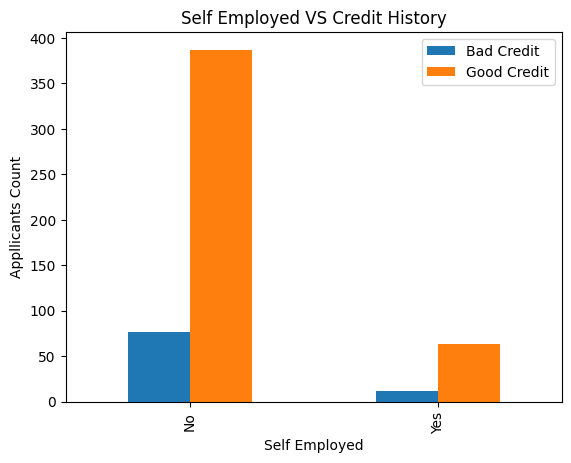

In [ ]:
pd.crosstab(df['Self_Employed'],df['Credit_History']).plot.bar()
plt.title('Self Employed VS Credit History')
plt.xlabel('Self Employed')
plt.ylabel('Appllicants Count')
plt.legend(['Bad Credit','Good Credit'])
plt.show()

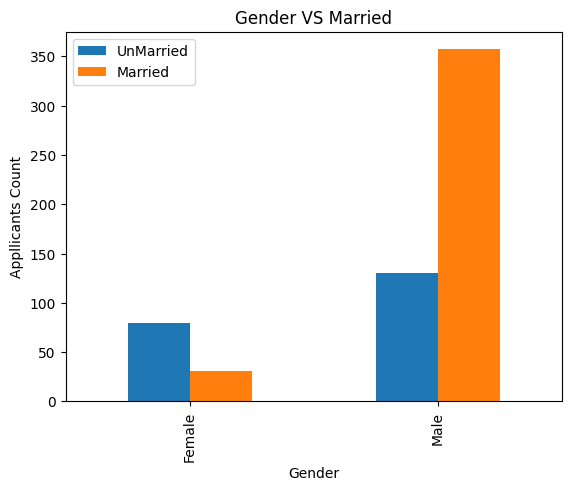

In [ ]:
pd.crosstab(df['Gender'],df['Married']).plot.bar()
plt.title('Gender VS Married')
plt.xlabel('Gender')
plt.ylabel('Appllicants Count')
plt.legend(['UnMarried','Married'])
plt.show()

In [ ]:
df.groupby('Education')['Loan_Status'].describe()

,count,unique,top,freq
Education,,,,
Graduate,480,2,Y,340
Not Graduate,134,2,Y,82


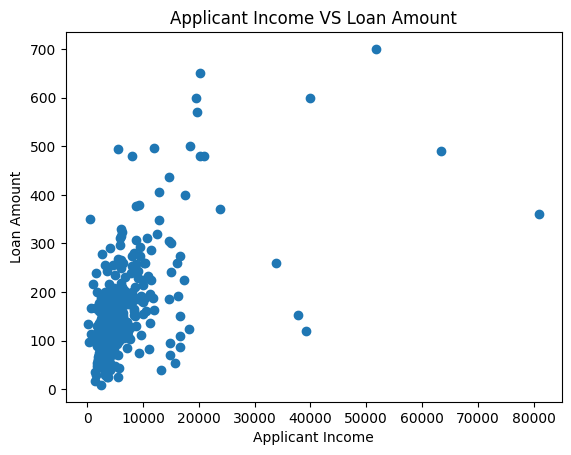

In [ ]:
plt.scatter(df['ApplicantIncome'],df['LoanAmount'])
plt.title('Applicant Income VS Loan Amount')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


<Axes: xlabel='Loan_Amount_Term'>

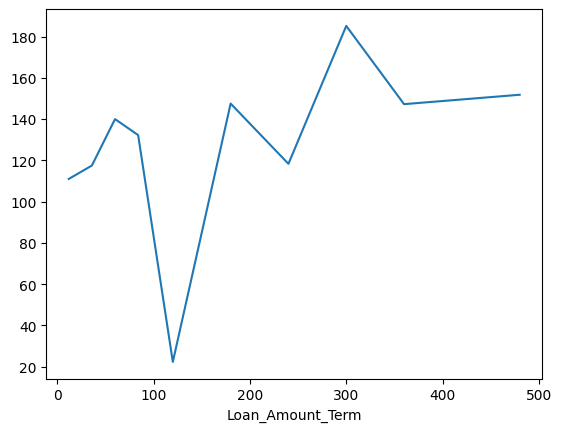

In [ ]:
df.groupby('Loan_Amount_Term').LoanAmount.mean().plot()

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

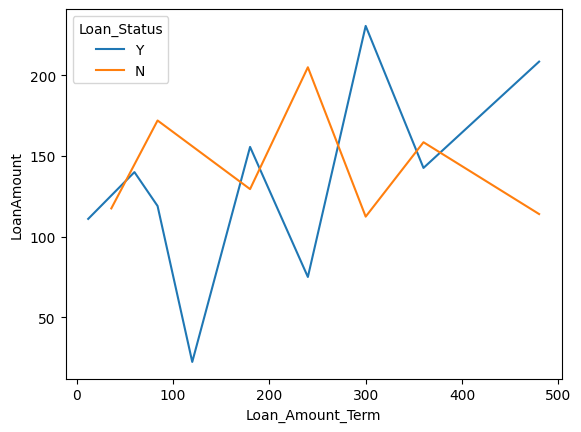

In [ ]:
sns.lineplot(x=df['Loan_Amount_Term'],y=df['LoanAmount'],hue=df['Loan_Status'],errorbar=None)


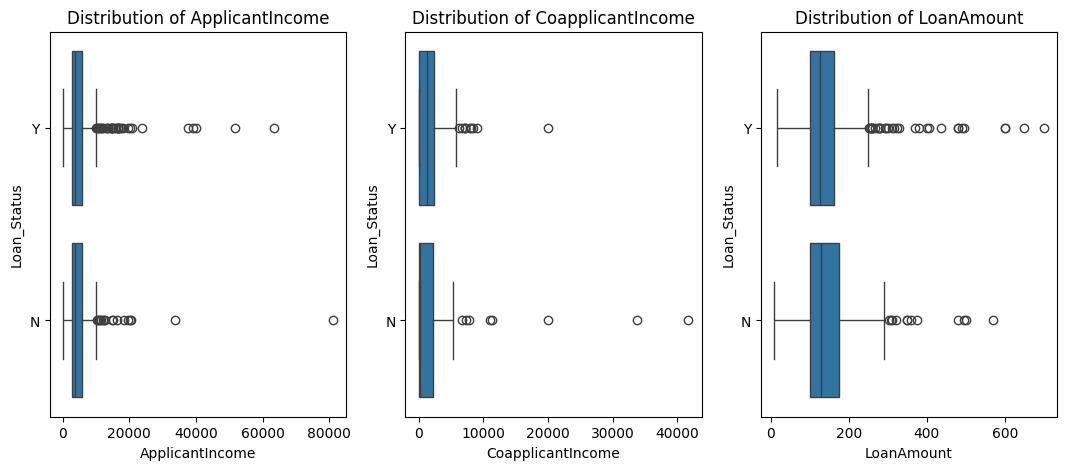

In [ ]:
fig,axes=plt.subplots(ncols=3,figsize=(13,5))
for index,col in enumerate(numerical_cols):
  sns.boxplot(x=df[col],y=df['Loan_Status'],ax=axes[index]).set(title=f"Distribution of {col}")
plt.show()

##THE EDA PART IS COMPLETED

##DATA PREPROCESSING
###DATA CLEANING

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
null_count=df.isnull().sum()
null_col=null_count[null_count>0].index.to_list()
print(null_col)

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [ ]:
null_col.remove('LoanAmount')

###Data Imputation

In [ ]:
def fillna_mode(col_name):
  df[col_name]=df[col_name].fillna(df[col_name].mode()[0])
for col in null_col:
  fillna_mode(col)

In [ ]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


###Check for outliers

<Axes: xlabel='LoanAmount'>

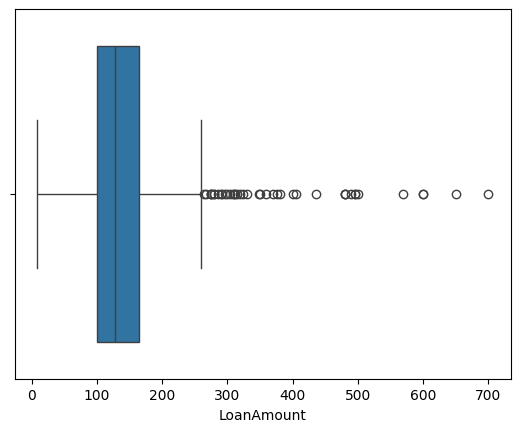

In [ ]:
sns.boxplot(x=(df['LoanAmount']))

###Remove Outliers

In [ ]:
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
n=numerical_cols.copy()
q1=df[n].quantile(0.25)
q3=df[n].quantile(0.75)
IQR=q3-q1
df[n]=df[n][(df[n]>(q1-1.5*IQR))&(df[n]<(q3+1.5*IQR))]

<Axes: xlabel='LoanAmount'>

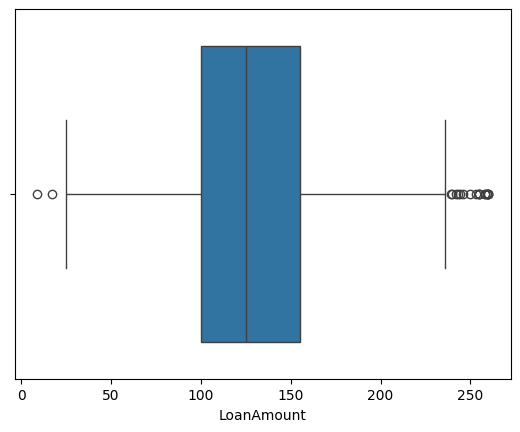

In [ ]:
sns.boxplot(x=(df['LoanAmount']))

###Squared root transformation to treat Skewed data

In [ ]:
def sqrt_transformaiton(col):
  df[col]=(df[col]**1/2)
for col in numerical_cols:
    sqrt_transformaiton(col)

<Axes: ylabel='Density'>

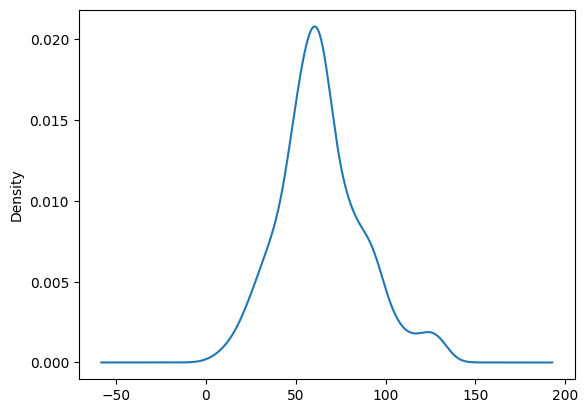

In [ ]:
df['LoanAmount'].plot.kde()

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

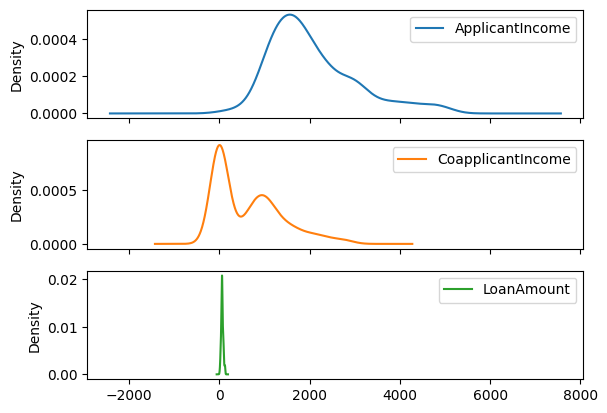

In [ ]:
df[numerical_cols].plot(kind='kde',subplots=True)

In [ ]:
df[numerical_cols].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,564.000000,596.00000,573.000000
mean,2062.361702,644.56453,64.241710
std,963.494903,730.86254,23.188637
min,75.000000,0.00000,4.500000
25%,1372.000000,0.00000,50.000000
50%,1819.250000,515.50000,62.500000
75%,2505.250000,1086.50000,77.500000
max,5069.500000,2850.50000,130.000000


In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,2924.5,0.0,64.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,2291.5,754.0,64.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,1500.0,0.0,33.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,1291.5,1179.0,60.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,3000.0,0.0,70.5,360.0,1.0,Urban,Y


###Feature Seleciton

In [ ]:
#select feature and target
x=df.drop(['Loan_ID','Loan_Status'],axis=1)
y=df['Loan_Status']

In [ ]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,2924.5,0.0,64.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,2291.5,754.0,64.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,1500.0,0.0,33.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,1291.5,1179.0,60.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,3000.0,0.0,70.5,360.0,1.0,Urban


###Feature Engineering

In [ ]:
x_cat_cols=x.select_dtypes(include='object').columns
x_cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [ ]:
x_cat_cols = list(x_cat_cols) + ['Loan_Amount_Term']
print(x_cat_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Amount_Term']


###Handle Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
x[x_cat_cols]=x[x_cat_cols].apply(LabelEncoder().fit_transform)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,2924.5,0.0,64.0,8,1.0,2
1,1,1,1,0,0,2291.5,754.0,64.0,8,1.0,0
2,1,1,0,0,1,1500.0,0.0,33.0,8,1.0,2
3,1,1,0,1,0,1291.5,1179.0,60.0,8,1.0,2
4,1,0,0,0,0,3000.0,0.0,70.5,8,1.0,2


In [ ]:
df['Credit_History']=df['Credit_History'].astype(int)

In [ ]:
x.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,int64
Credit_History,float64


###Feature Scaling

In [ ]:
print(numerical_cols)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[numerical_cols]=scaler.fit_transform(x[numerical_cols])

In [ ]:
x.sample(5)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
519,0,0,0,1,0,-0.376425,-0.882664,-0.722610,8,1.0,0
6,1,1,0,1,0,-0.930630,0.155338,-0.722610,8,1.0,2
171,1,1,3,0,0,NaN,-0.882664,NaN,7,1.0,2
396,0,0,0,0,0,-0.490694,-0.882664,-1.240557,8,0.0,2
264,1,0,0,0,1,0.540844,-0.882664,-0.010433,8,1.0,1


In [ ]:
df.to_csv('loan_prediction')